In [111]:
from collections import Counter
import random
from typing import Tuple, Union

import matplotlib.pyplot as plt

## Question  1

Consider the following game:

|      1       | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   |     | 10  | 11  | 12  |
| :----------: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Hunter start | _____   | _____   | _____   | _____   | _____   | Moose start  | _____   | _____   | _____   | _____   | _____ |Moose house   |


The game board has 12 spaces. A moose starts on space 7, and a hunter on space 1. On each game
turn a 6-sided die is rolled. On a result of 1 to 4, the moose moves that many spaces forward. On a
result of 5 or 6, the hunter moves that many spaces forward. The moose wins if it reaches space
12 (the final roll does not have to be exact, moving past space 12 is ok). The hunter wins if he
catches the moose, in other words reaches the same or a higher space.

What are the probabilities of winning for the moose and the hunter?

### Answer

#### Monte Carlo simulation

Considering the formulation above, it is possible to use a technique known as [**Monte Carlo simulation**](https://www.youtube.com/watch?v=OgO1gpXSUzU) to infer the probabilities of winning for the moose and the hunter. This strategy relies on repeated random sampling to obtain numerical results, which can be used to estimate the probabilities of a uncertain events. This strategy is strictly related to the **Law of large numbers**, that states that the more a experiment is repeated independently, the closer the average results would be to the expected value

So, for instance, if you flip a fair coin ten times, it is expected that half of the times it would be showing heads and the other half tails. But maybe, it shows heads 8 times from 10. Or even 10 heads from 10. However, as soon there are a considerable amount of flips, let's say, 1 million, the tendency is that we have a 50/50 proportion of heads and tails.

##### Coin flipping simulation

In [69]:
def flip_a_coin() -> str:
    return random.choice(["heads", "tails"])

heads_occurences = []

for repetitions in range(10, 10**5, 1000):
    heads = 0
    for flips in range(repetitions):
        coin_side = flip_a_coin()
        if coin_side == "heads":
            heads += 1
    heads_occurences.append((repetitions, heads))

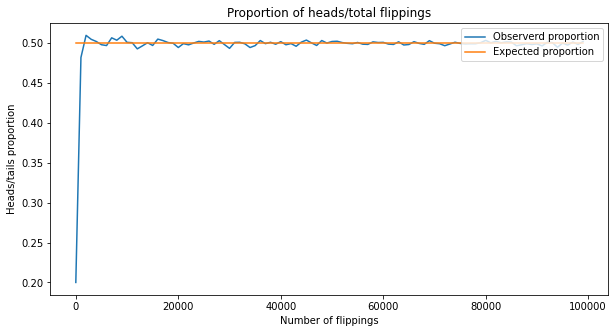

In [88]:
plt.figure(figsize=(10,5))
plt.title("Proportion of heads/total flippings")
plt.plot([h[0] for h in heads_occurences], [h[1]/h[0] for h in heads_occurences], label="Observerd proportion")
plt.plot([h[0] for h in heads_occurences], [0.5]*len(heads_occurences), label="Expected proportion")
plt.xlabel("Number of flippings")
plt.ylabel("Heads/tails proportion")
plt.legend(loc="upper right");

##### Moose vs hunter simulation

In [74]:
def play_the_game() -> str:
    moose_pos = 7
    hunter_pos = 1
    
    while True:
        dice_side = random.randint(1,6)

        if dice_side <= 4:
            moose_pos += dice_side
        else:
            hunter_pos += dice_side

        if hunter_pos >= moose_pos:
            return "hunter"
            break
            
        elif moose_pos >= 12:
            return "moose"
            break

def run_simulation(number_of_games: int) -> Tuple[int]:
    moose_wins = 0
    hunter_wins = 0
            
    for game in range(number_of_games):
        winner = play_the_game()
        
        if winner == "moose":
            moose_wins += 1
        else:
            hunter_wins += 1
        
    return moose_wins, hunter_wins
  
results = []
for repetitions in range(100):
    results.append(run_simulation(10**5))

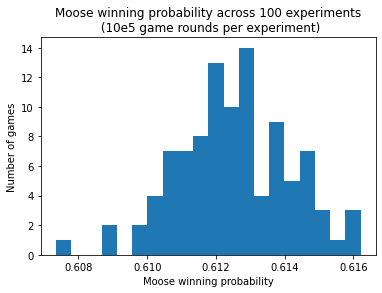

In [93]:
plt.title("Moose winning probability across 100 experiments\n (10e5 game rounds per experiment)")
plt.ylabel("Number of games")
plt.xlabel("Moose winning probability")
plt.hist([i[0]/10**5 for i in results], bins=20);

In [96]:
print(f"Moose average winning probability: {100*sum([i[0]/10**5 for i in results])/100} %")

Moose average winning probability: 61.25349999999999 %


## Question 2

2. A set of numbers has an average of 100. And the largest element is 5 greater than 3 times the
smallest element. Which element cannot be in the set?

- a) 30
- b) 80
- c) 154
- d) 120
- e) 50

### Answer

As a measure of central tendency, an average (or mean), by definition, must lie between the minimun and maximun values used in its calculation. Mathematically, this fact can be defined by:

$$
  min \leq average \leq max
$$

Knowing that the maximum value is:

$$
  max = 3*min + 5
$$

We have:

$$
  3*min + 5 \geq 100 \\
  3*min \geq 95 \\
  min \geq 31.7
$$

So any element lesser than or equal to 31.7 cannot be in the set, which gives the alternative **a)** as answer.

## Question 3

Given the sample: S = [1, 2, 3, 4, 1, 5, 2, 2, 3]. Compute the mean, mode, median, standard
deviation and standard error.

In [148]:
def mean(l: list) -> float:
    return sum(l)/len(l)

def mode(l: list) -> int:
    countings = Counter(l)
    return countings.most_common(1)[0][0]

def median(l: list) -> Union[int, float]:
    l.sort()
    n = len(l)
    return l[(n+1)//2 - 1] if n%2 else (l[(n//2) - 1] + l[(n//2)])/2

def std_dev(l: list) -> float:
    l_mean = mean(l)
    result = 0
    for value in l:
        result += (value - l_mean)**2
    return (result/len(l))**(1/2)

def std_error(l: list) -> float:
    l_std_dev = std_dev(l)
    
    return (l_std_dev)/(len(l)**(1/2))

In [149]:
s = [1, 2, 3, 4, 1, 5, 2, 2, 3]

print(f"Mean: {mean(s)}")
print(f"Mode: {mode(s)}")
print(f"Median: {median(s)}")
print(f"Standard deviation: {std_dev(s)}")
print(f"Standard error: {std_error(s)}")

Mean: 2.5555555555555554
Mode: 2
Median: 2
Standard deviation: 1.2570787221094177
Standard error: 0.41902624070313926


## Question 4
There are 3 stores: A, B and C. 50% of customers buy at A and 30% at B. A marketing campaign
is launched and the response rate is: 50% for A, 60% for B and 90% for C.

- a. What is the probability that a random customer didn’t respond to the campaign?
- b. What is the probability that a responder went to C?

### Answer

**a.**

Considering that the sets of customers of the three stores are disjoint, i.e., there are no intersection among them, and assuming that the all the rest of the customers (20%) buy at the store C, we can draw the following tree diagram representing the probabilities:


![image](probs_tree.png)

So, the probability that a random customer don't respond the campaing is equal to:

$$
  p(\neg R) = p(A, \neg R) + p(B, \neg R) + p(C, \neg R)
$$

Which is:

In [11]:
print(f"p(¬𝑅): {100*(0.25 + 0.12 + 0.02)}%")

p(¬𝑅): 39.0%


**b.**

The probability of a responder went to C can be understood as the conditional probability of a customer **went to C given that he is a responder**, wich can be formulated as:

$$
  P(C|R) = \frac{p(C, R)}{p(R)}
$$


As the sum of a probability and its complement must always be equal to one and calculated the probability of that random customer didn't respond the campaign above, we can set that:

$$
  p(R) = 1 - P(\neg R)
$$

And rewrite the formula like:

$$
  P(C|R) = \frac{p(C, R)}{1 - p(\neg R)}
$$


Calculating it, we have:

In [14]:
print(f"p(C|R): {100*(0.18/(1-0.39)):.2f}%")

p(C|R): 29.51%


## Question 5

There is a box with 12 dice which all look the same. However there are actually three types of
dice:
    
- a. 6 normal dice. The probability to get a 6 is 1/6 for each dice
- b. 3 biassed dice. The probability to get a 6 is 0.85
- c. 3 biassed dice. The probability to get a 6 is 0.05

If you take a die from the box at random and roll it. Find the conditional probability that it
is of type b. given that it gives a 6.

### Answer

This question can be answered using the [Bayes theorem](https://machinelearningmastery.com/bayes-theorem-for-machine-learning/), which is derived from the conditional probability formula used in Question 4:


$$
  p(A|B) = \frac{p(A, B)}{p(B)} \\
$$

Isolation the numerator, we have:

$$
  p(A, B) = p(A|B) * p(B)
$$

Similarly:

$$
  p(B|A) = \frac{p(B, A)}{p(A)} \\
  p(B, A) = p(B|A) * p(A)
$$

As *p(A, B) = p(B, A)*, we can yield the Bayes theorem from the expression below:

$$
  p(A|B) * p(B) = p(B|A) * p(A) \\
  p(A|B) = \frac{p(B|A) * p(A)}{p(B)}
$$

So, for the proposed problem above, we have:

$$
  p(b|6) = \frac{p(6|b)*p(b)}{p(6)}
$$

$$
  p(6|b) = 0.85 \\
  p(b) = 3/12 = 0.25 \\
  p(6) = p(a)*p(6|a) + p(b)*p(6|b) + p(c)*p(6|c) = 0.5*(1/6) + 0.25*0.85 + 0.25*0.05 \approx 0.31 \\
$$

Using Python, we can calculate *p(b|6)*:

In [3]:
p_6_given_b = 0.85
p_b = 0.25
p_6 = 0.5*(1/6) + 0.25*0.85 + 0.25*0.05

p_b_given_6 = p_6_given_b*p_b/p_6
print(f"p(b|6): {100*p_b_given_6:.2f}%")

p(b|6): 68.92%
